<div id=header class="alert alert-block alert-info">
<b>Final Project For Course 236502001 - כלים טכנולוגיות קוד פתוח למערכות תבוניות </b>
        <BR>Presented By:
        <BR>&emsp;1. Tali Presaizen 304449226
        <BR>&emsp;2. Mor Atiya 123456789
        <BR>&emsp;3. Amir Yorav 037378874
    <BR>Kaggle user: <a href=”https://www.google.com">KKK</a></div>

 # Table of Contents  
1. [Introduction](#Introduction)   
    1. Data Set Description
    1. Variable Description
1. [Imports](#-Imports) 
1. [Exploring The Data](#Exploring-The-Data) 
    1. Loading
    1. Autogenerated Visual Reports
    1. Missing Values
    1. Variable Correlations
    1. Target Variable
    1. Outliers
1. [Prepering Data for models](#Prepering-Data-for-models)     
    1. Target variable skew
    1. Predictors treatment
    1. Encoding
    1. Transform skewed features
    1. Splitting the Data
    1. Outliers
1. [Feature Selection](#-Feature-Selection)
    1. [Ridge-Lasso-Elasticnet](#Ridge-Lasso-Elasticnet) 
    1. [Trees](#Trees) 
    1. [PCA](#PCA)
1. [SGD Model](#SGD-Model)     
    1. [Tune Hyper Parameters](#SGD---Tune-Hyper-Parameters)
    1. [Evaluating on Validation set](#SGD---Evaluating-on-Validation-set)
    1. [Model Submission](#SGD---Model-Submission)     
1. [Random Forest Model](#Random-Forest-Model)     
    1. [Tune Hyper Parameters](#RF---Tune-Hyper-Parameters)
    1. [Evaluating on Validation set](#RF---Evaluating-on-Validation-set)     
    1. [Model Submission](#RF-Model-Submission) 
1. [Model TTT](#Model-TTT)     
    1. [Tune Hyper Parameters](#TM---Tune-Hyper-Parameters)   
    1. [Evaluating on Validation set](#TM---Evaluating-on-Validation-set)     
    1. [Submission](#TM---Submission) 
1. [Ensemble of the Models](#Ensemble-of-the-Models)     
    1. [Create Ensemble](#Create-Ensemble)    
    1. [Evaluating on Validation set](#Evaluating-on-Validation-set)     
1. [Final Submission](#Conclusions) 
1. [Conclusions](#Conclusions) 
1. [References](#References)    

<table id=Introduction style="width:100%">
<tr><td><h1>Introduction</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

In this project our task is to accurately predict house sales price in Iowa USA based on kaggle "House Prices - Advanced Regression Techniques" competition. 
The assignment will be bases on a big training data with a known sale price and will be tested on a test data with an unknown sale price.
Best prediction should achieve least RMSE on test data.
We will present some methods and approaches based on ML course and Open Source tools that we earned.
Since we didn't study deep learning methods, we are not going to implemet those methods in this project.
The notebook will cover the following steps:
* Data analysis and preperation
* Feature selection and regularization
* Model selection and fitting by tuning hyper-parameters 
* Optimization by ensambling different models 
* Submission and competition score 

### Data Set Description

From the Kaggle competition, we receive two sets of data: 
    a <b>training set</b> with 1,460 observations, 80 features (including ID), and the target SalePrice; 
    and a <b>test set</b> with 1,459 observations, referred to as unseen data, for RMSE calculation of our submission model.
    
Some observations have missing data in some features, which we will take care of carefully in the next section. We will also evaluate our model's performance by dividing the training set into training and <b>validation sets</b> and implementing techniques such as K-Fold CV

### Variable Description

As mentioned before, we have 79 explanatory variables describing (almost) every aspect of residential homes.
The variables include both <b>numerical</b> and <b>categorical</b> types, with different influence on the sale price. 
Some of the features have <b>missing data</b>, which we will handle later (at data cleaning section)

We will next explore those features and their correlation with the target price שnd then choose only the most influent set of them.
But first we read and understand each variable based on our common sense and then will visualize, clean and preprocess the relevant features.

The main features refer to the The house size and condition, living area, basement area, interior, exterior etc.
Also the surroundings like the neigborhood, the street, proximity to conditions etc.
Type of the house: building class, year built, type of the roof etc.
Year and month of sale...

And it also includes: 
overall material and finish quality
and overall condition rating

We will now take a closer look:

#### Categorical features:
* <b>Location and neighborhood</b>: 'MSZoning', 'Neighborhood', 'Condition1', 'Condition2' 
* <b>Type and condition of the outdoors</b>: 'Street', 'Alley', 'PavedDrive', 'LotShape', 'LotConfig', 'LandSlope', 'Foundation', 'MasVnrType'
* <b>Type and style of property</b>: 'MSSubClass', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'LandContour'
* <b>Interior</b>: 'Utilities','Heating', 'CentralAir', 'Electrical', 
* <b>Basementfeatures</b>: 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2'
* <b>Garage features</b>: 'GarageFinish', 'GarageType','GarageQual', 'GarageCond'
* <b>Exterier</b>: 'Exterior1st', 'Exterior2nd', 'Fence', 'PoolQC'
* <b>Condition and quality</b>: 'SaleCondition', 'HeatingQC', 'FireplaceQu', 'KitchenQual', 'ExterQual', 'ExterCond', 'Functional'
* <b>Misc</b>: 'MiscFeature'
* <b>Selling information</b>: 'SaleType'

#### Numerical features:
* <b>Size of property (area in SF)</b>: 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'KitchenAbvGr', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageArea', 'WoodDeckSF', 'PoolArea', 'MasVnrArea', 'OpenPorchSF', 'LotArea', 'GarageCars', '3SsnPorch', 'EnclosedPorch',  'ScreenPorch', 'LowQualFinSF'
* <b>Interier</b>: 'Fireplaces', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 
* <b>Condition of the outdoors</b>: 'LotFrontage'
* <b>Age of the property</b>:  'YearBuilt', 'GarageYrBlt', 'YearRemodAdd'
* <b>Evaluated Grade</b>: 'OverallQual', 'OverallCond', 'MiscVal'
* <b>Selling information</b>: 'MoSold', 'YrSold'         
       
### Shall we begin?

<table id=-Imports style="width:100%">
<tr><td><h1>Imports</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table> 

In [39]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# define plt settings
plt.rcParams["font.size"] = 8
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["legend.fontsize"] = 8
plt.rcParams["figure.figsize"] = (5,5)


# sklearn imports
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR

#for some statistics
from scipy.stats import uniform
from scipy import stats
from scipy.stats import norm, skew 
from statistics import mean 

# plotly imports
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import warnings
warnings.filterwarnings('ignore')

<table id=Exploring-The-Data style="width:100%">
<tr><td><h1>Exploring The Data</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

### Loading

In [40]:
train_data = pd.read_csv("Data/train.csv")
test_data = pd.read_csv("Data/test.csv")

In [41]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [42]:
train_data.shape

(1460, 81)

In [43]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


<div class="alert alert-block alert-success">
We see that <strong>train_data</strong> have all the columns except the <strong>'SalePrice'</strong> which is our target
</div>

<div class="alert alert-block alert-success">
<strong>Id</strong> column is just the DB table index, we will remove it later
</div>

In [44]:
target = train_data['SalePrice']
all_data = pd.concat([train_data.drop('SalePrice',axis=1), test_data])

<div class="alert alert-block alert-success">
we concat<strong> all data </strong>so we can make all the preprocessing on all
</div>

In [45]:
all_data.shape

(2919, 80)

### Autogenerated Visual Reports

#report inline in notebook
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
dft = AV.AutoViz("", depVar='SalePrice', dfte=train_data, verbose=2)

# Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
#       verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.

In [46]:
#report opened as saperate html page  
#import sweetviz as sv
#analyze_report = sv.analyze(train_data)
#analyze_report.show_html()

<div class="alert alert-block alert-success">
Thsse reports gives us a general idea of where we at, and some hints about the relevant features and preprocessing
</div>

In [47]:
#we are adding now matplotlib inline plots.  ->we didn't do it before because we didn't want to show AutoVis inline graphs ('verbose=2' still show some graphs). 
%matplotlib inline

### Missing Values

In [48]:
# find missing data percentage for each column
def find_missing(df):
    df_na =(df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
    missing_df = pd.DataFrame({'Missing Data' :df_na})
    return missing_df

In [49]:
na_data = find_missing(all_data)
na_data

,Missing Data
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071
GarageYrBlt,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

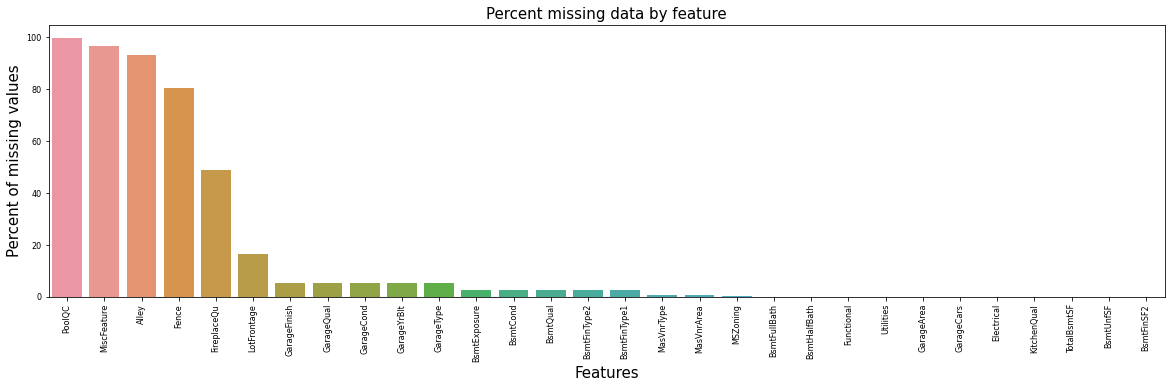

In [50]:
f, ax = plt.subplots(figsize=(20, 5))
plt.xticks(rotation='90')
sns.barplot(x=na_data.index, y=na_data['Missing Data'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

<div class="alert alert-block alert-success">
We can see above that the data have 19 features with nulls, 5 categorical features with high percentage of missing ratio (>47%):
    <BR>* 'PoolQC'
    <BR>* 'MiscFeature'
    <BR>* 'Alley'
    <BR>* 'Fence'
    <BR>* 'FirePlaceQU'
<BR>We assume that they have small contribution to our target price. 
They are candidates to drop or use them to create another more interesting feature
We will check it in the next feature selection part if we realy can remove those features.
</div>

<div class="alert alert-block alert-success"> 
    In some features <b>Nan</b> has a <strong>meaning</strong>.
Lets make a deeper exploration by deviding into categorical and numerical
</div>

### Fill categorical missing values
Fill categorical missing values accordingly:
* If NaN stands for a real value - change it to 'None'
* If NaN is realy a missing data value - change it according to the column mode 

In [51]:
# First we need to transform some numerical variables that are really categorical

#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)


In [52]:
# check the categorical features with missing values
def check_object_nulls():
    print (all_data.select_dtypes('object').loc[:, all_data.isna().sum()>0].columns)

In [53]:
check_object_nulls()

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')


In [54]:
##By overview of data description, we can see that:
 #PoolQC : NA means "No Pool".
    #That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
 #MiscFeature : NA means "no misc feature"
 #Alley :  NA means "no alley access"
 #Fence : NA means "no fence"
 #FireplaceQu : NA means "no fireplace"
 #BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : NaN means that there is no basement.
 #GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
 #MSSubClass : NA most likely means No building class. We can replace missing values with None

# Impute using a constant value (for the case where NaN stands for a real value, like 'None')
cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MSSubClass']
for column in cols : 
    all_data[column] = all_data[column].fillna('None')
    
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
#Functional : data description says NA means typical
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
#SaleType : Fill in again with most frequent which is "WD"
#MasVnrType : NA most likely means no masonry veneer for these houses. None for the type.


# Impute using the column mode (which is the most used type of category)
cols = ['MSZoning', 'Functional', 'Electrical',  'KitchenQual',  'Exterior1st', 'Exterior2nd', 'SaleType',
        'MasVnrType']
for column in cols : 
    all_data[column] = all_data[column].fillna(all_data[column].mode()[0])
        
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
all_data = all_data.drop(['Utilities'], axis=1)

In [55]:
check_object_nulls()

Index([], dtype='object')


<div class="alert alert-block alert-success"> 
    No nulls remain
</div>

### Fill numerical missing values
Fill numerical missing values accordingly: 
* If NaN stands for a real value - change it to 0
* If NaN is realy a missing data value - make an estimation according to KNN or mean value in the Neighborhood

In [56]:
#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : 
#missing values are likely zero for having no basement
#MasVnrArea: NA most likely means no masonry veneer for these houses. We can fill 0 for the area 

cols = ['GarageYrBlt', 'GarageArea', 'GarageCars',
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']
for column in cols:
    all_data[column] = all_data[column].fillna(0)

#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [57]:
missing = find_missing(all_data)
missing

,Missing Data


<div class="alert alert-block alert-success">
<b>Hurray!</b> No missing data left!
</div>

### Variable Correlations

Next we present a <b>heatmap</b> showing correlation between the different features including the target. showing only high (>0.6) correlations

In [58]:
def plot_correlation_heatmap(df):
    plt.figure(figsize=(16, 10))
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cut_off = 0.6  # only show cells with abs(correlation) at least this value
    extreme_1 = 0.75  # show with a star
    extreme_2 = 0.85  # show with a second star
    extreme_3 = 0.90  # show with a third star
    mask |= np.abs(corr) < cut_off
    corr = corr[~mask]  # fill in NaN in the non-desired cells

    remove_empty_rows_and_cols = True
    if remove_empty_rows_and_cols:
        wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
        wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
        corr = corr.iloc[wanted_cols, wanted_rows]

    annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '*')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '**')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '***')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
    heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', annot_kws={"fontsize":15})
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 20}, pad=16)
    plt.xticks(rotation=90, fontsize=20) 
    plt.yticks(rotation=0, fontsize=20) 
    plt.show()

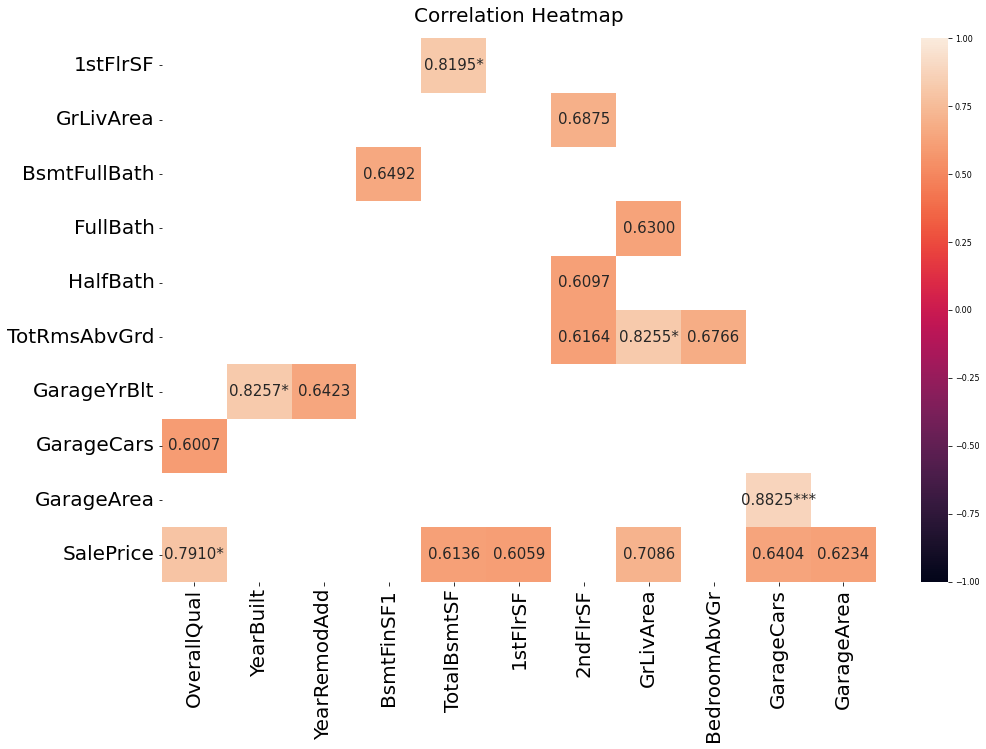

In [59]:
plot_correlation_heatmap(train_data)

<div class="alert alert-block alert-success">
From the above map we can recognize some correlative features and consider to remove them <strong>here</strong>
</div>

<div class="alert alert-block alert-success"><B>Features to remove:</B>
<BR>'GarageCars' and 'GarageArea' are highly  corellated (which makes sense), and they also have a similar corellation to target, but since <b>'GarageCars'</b> has a slight less information (categorical) we shall remove it. 
<BR>Also 'GrLivArea' and 'TotRmsAbvGrd'  are highly  corellated (which also surprisingly makes sense), but since 'GrLivArea' has a a high corellation to target we shall remove <b>'TotRmsAbvGrd'</b>. 
<BR>Same for '1stFlrSF' and 'TotalBsmtSF'. '1stFlrSF' has smaller corellation to target and thus we will remove <b>'1stFlrSF'</b>.
<BR>
<BR> This is a classic example of <b>feature selection in supervised learning</b>. 
<BR> Corellated features is like sampling same information twice, they add no new information and hance it's a good idea to remove them for a better prediction.   
    
</div>.

#### More detailed correlation between features and target

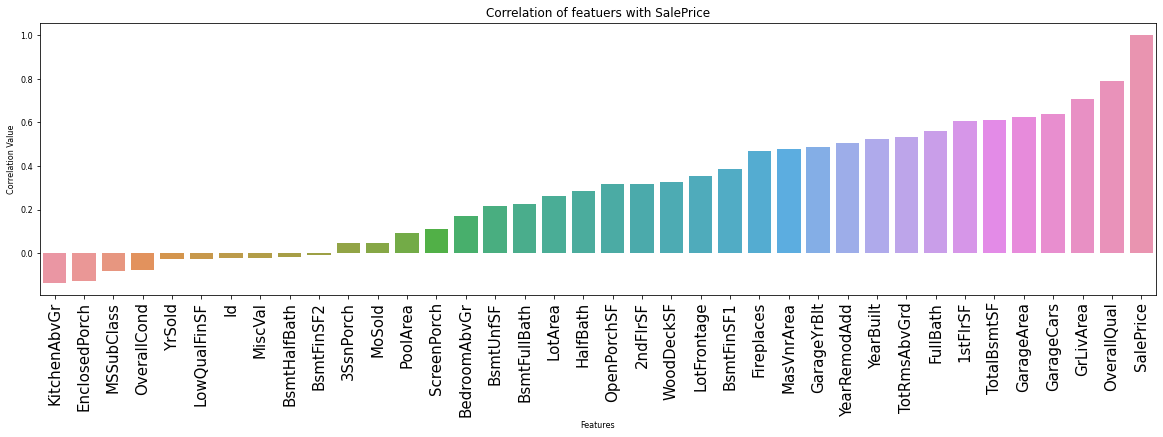

In [60]:
correlation_matrix = train_data.corr('pearson')
target_correlation = pd.DataFrame(correlation_matrix.columns,columns=['Feature'])
target_correlation['Corr'] = correlation_matrix['SalePrice'].values
plt.figure(figsize = (20,5))
sns.barplot(x='Feature', y='Corr', data = target_correlation.sort_values(['Corr']))
plt.xticks(rotation=90, fontsize=15)
plt.title('Correlation of featuers with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation Value')
plt.show()

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

In [61]:
corr_predictors = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'GarageCars', 'OverallQual']
# GrLivArea
outliers_GrLivArea = list(train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<300000)].index)
# TotalBsmtSF
outliers_TotalBsmtSF = list(train_data[(train_data['TotalBsmtSF']>4000) & (train_data['SalePrice']<300000)].index)
# 1stFlrSF
outliers_1stFlrSF = list(train_data[(train_data['1stFlrSF']>4000) & (train_data['SalePrice']<300000)].index)
# TotalBsmtSF
outliers_GarageArea = list(train_data[(train_data['GarageArea']>1200) & (train_data['SalePrice']<300000)].index)
#all:
all_idxs=[outliers_GrLivArea, outliers_TotalBsmtSF, outliers_1stFlrSF, outliers_GarageArea,[0] ,[0]]

In [62]:
# plot_corr_predictors
def plot_corr_predictors(predictor_names):
    plt.figure(figsize=(20,10))
    
    for count, predictor in enumerate(corr_predictors, start=1):
        plt.subplot(2,3,count)
        #main plot
        ax = sns.scatterplot(x = predictor, y = 'SalePrice', data = train_data, hue='OverallQual', palette= 'YlOrRd')
        #outliers
        #ax = sns.scatterplot(x = train_data[predictor][all_idxs[count-1]], y = train_data['SalePrice'][all_idxs[count-1]])
        plt.title("SalePrice against " + predictor, fontdict={'fontsize': 20})
        
        
        x = mean(train_data[predictor][all_idxs[count-1]])
        y = mean(train_data['SalePrice'][all_idxs[count-1]])
        
        ax.annotate('Outliers\n zone', xy=(x-100, y+0), xytext=(-20,20), 
            textcoords='offset points', ha='center', va='baseline',
            bbox=dict(boxstyle='round,pad=0.2', fc='maroon', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))

    plt.tight_layout(pad=4.0)
    plt.show()    

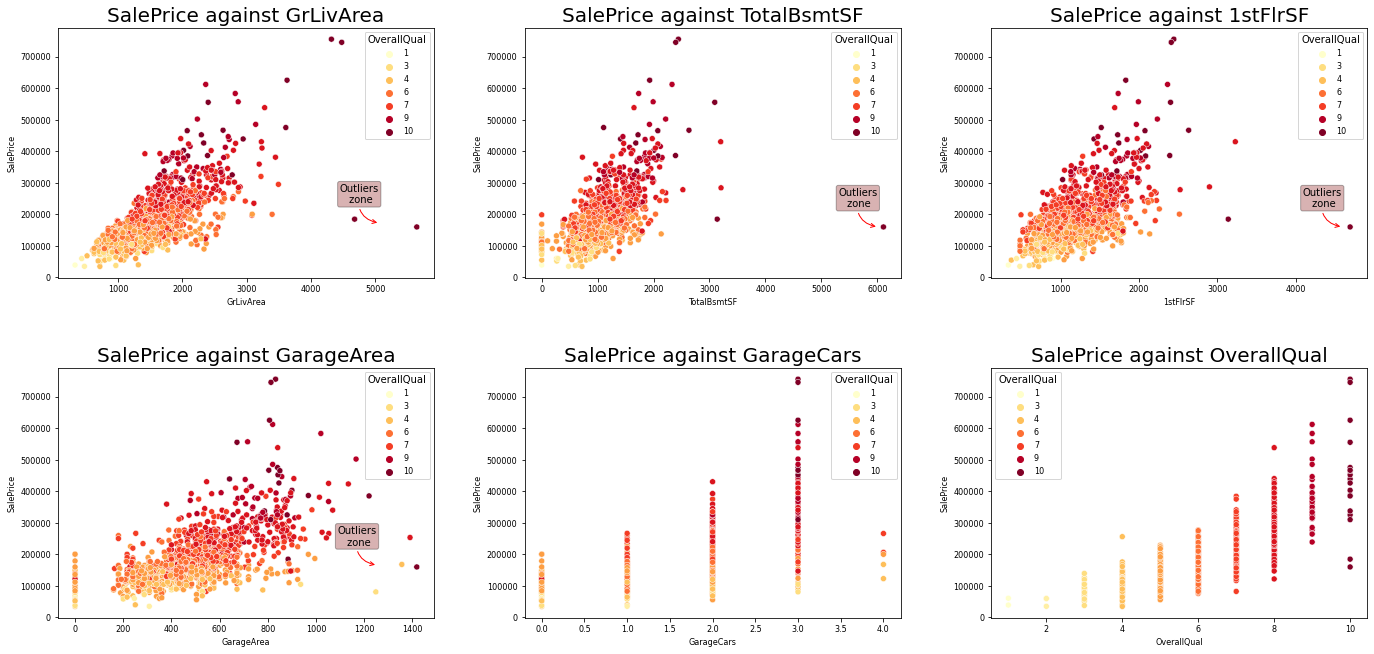

In [63]:
plot_corr_predictors(corr_predictors)

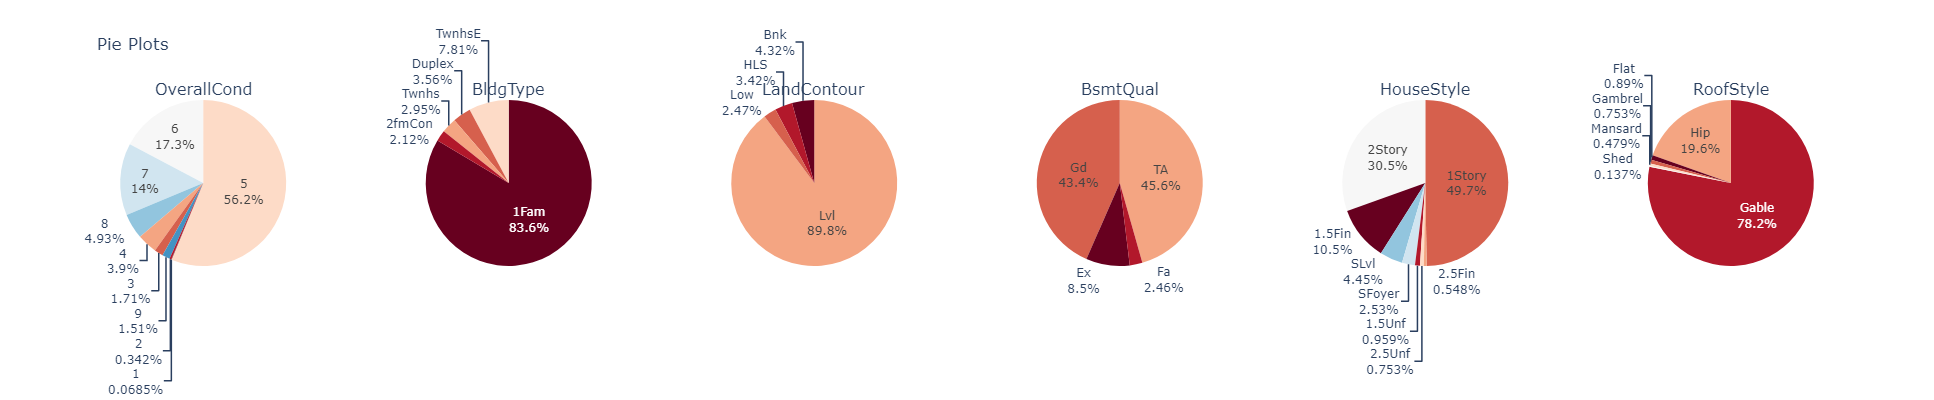

In [64]:
features = ['OverallCond', 'BldgType', 'LandContour', 'BsmtQual', 'HouseStyle', 'RoofStyle']

# Define a color scale for all pie charts
colors = color_discrete_sequence=px.colors.sequential.RdBu

# Create a grid of subplots using make_subplots with one row and six columns
fig = make_subplots(rows=1, cols=6, specs=[[{'type': 'pie'} for j in range(6)]], subplot_titles=features)

# Create a pie chart for each feature and add it to the grid of subplots
for i, feature in enumerate(features):
    # Group the DataFrame by the feature and count the unique values
    feature_counts = train_data.groupby(feature).size().reset_index(name='count')
    
    # Create a Pie chart for the feature using go.Pie
    fig.add_trace(go.Pie(labels=feature_counts[feature],
                         values=feature_counts['count'],
                         marker_colors=colors,  # Set a uniform color scale for all pie charts
                         legendgroup=feature,
                         textinfo='label+percent',
                         showlegend=False),  # Hide the legend
                  row=1,
                  col=i+1)
    
fig.update_layout(height=400, width=1500, title_text="Pie Plots")
fig.show()

In [65]:
# here we also wanted to practice SQL in pandas
query = 'SELECT OverallQual, GarageCars, AVG(SalePrice) AS SalePrice from train_data GROUP BY OverallQual, GarageCars'
sun_df = pysqldf(query)

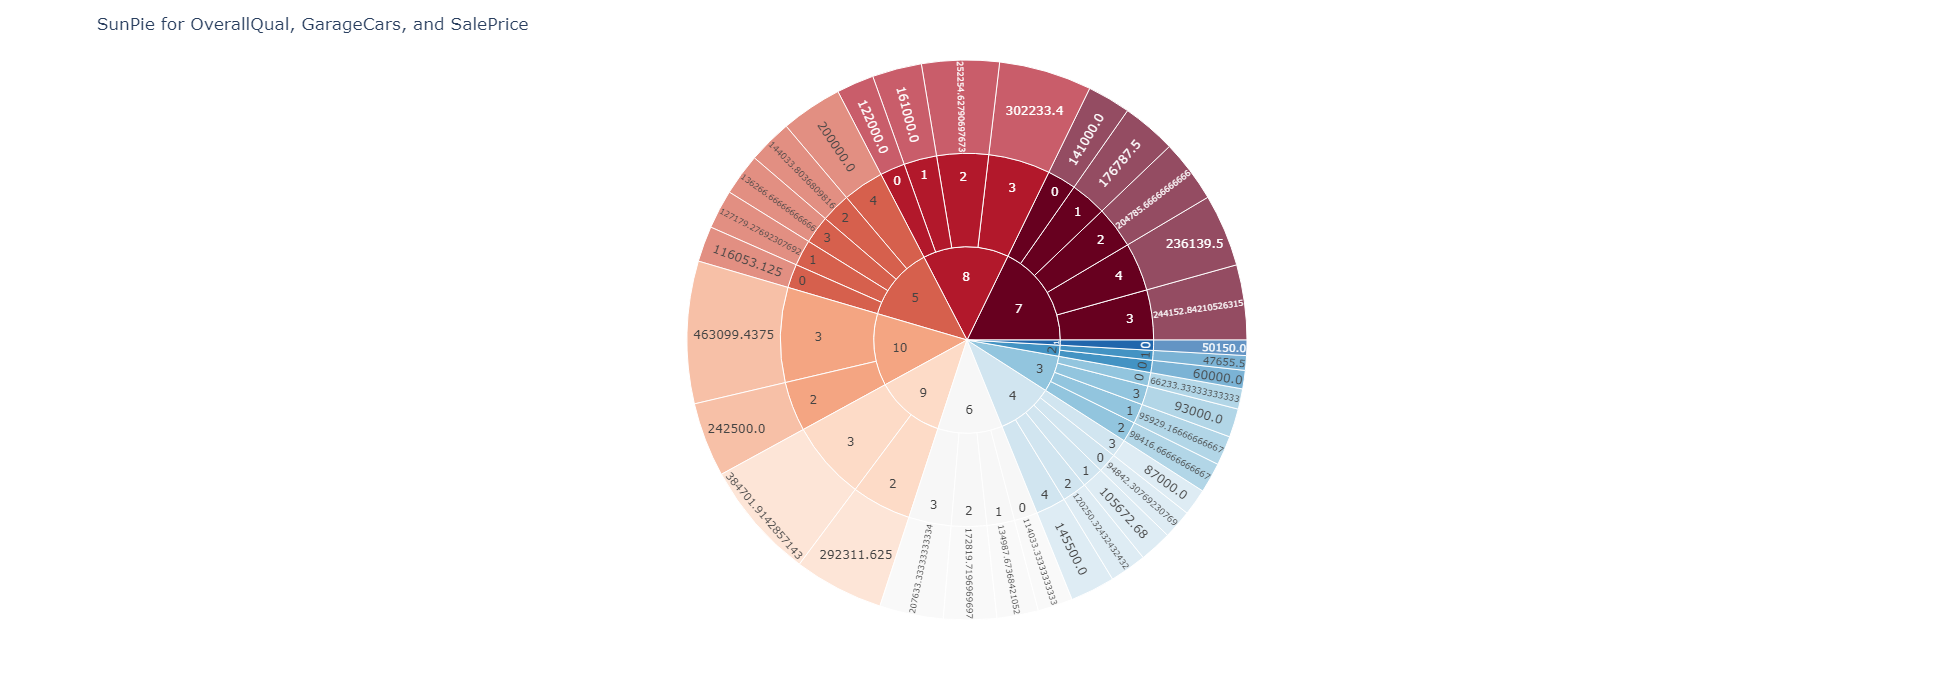

In [66]:
fig = px.sunburst(sun_df, path=['OverallQual', 'GarageCars', 'SalePrice' ], values=sun_df['SalePrice'], color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(height=700, width=700, title_text="SunPie for OverallQual, GarageCars, and SalePrice")
fig.show()

In [67]:
#area second #explain

In [68]:
# plot_bars for corr_predictors
def plot_bars(predictor_names):
    plt.figure(figsize=(20,10))
    
    for count, predictor in enumerate(predictor_names, start=1):
        grouped = train_data.groupby(predictor)['SalePrice'].mean().reset_index()
        plt.subplot(2,3,count)
        ax = sns.barplot(x = grouped[predictor], y = grouped['SalePrice'])
        plt.title('SalePrice VS ' + predictor, fontdict={'fontsize': 20})

    plt.tight_layout(pad=4.0)
    plt.show()   

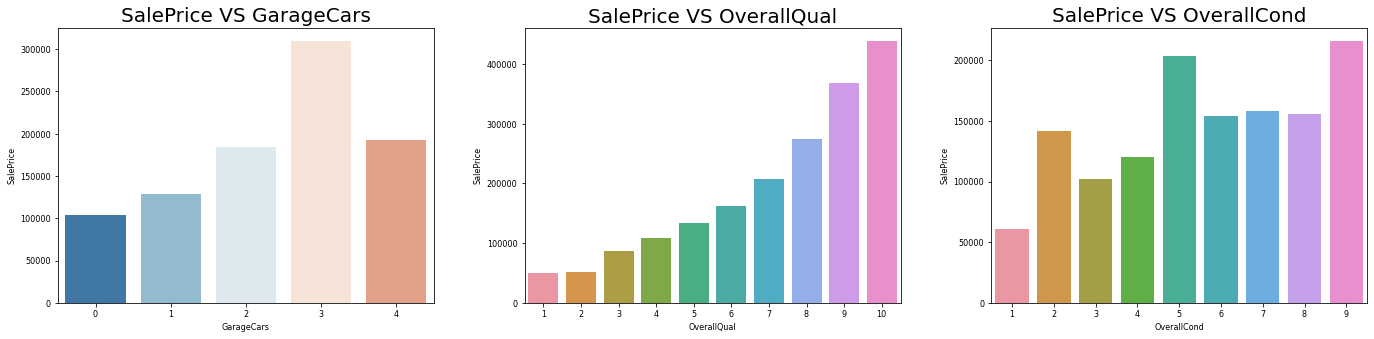

In [69]:
bar_predictors = ['GarageCars', 'OverallQual', 'OverallCond'] 
plot_bars(bar_predictors)

<div class="alert alert-block alert-success">
Comment <strong>MOR here</strong>
</div>

#### SalePrice against OverallQual

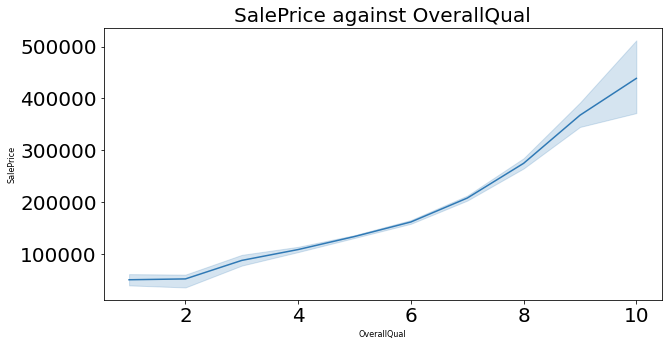

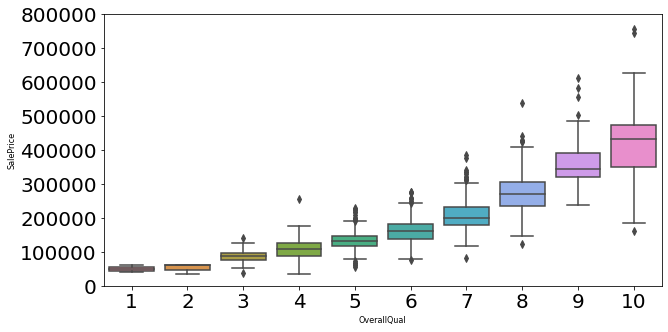

In [70]:
# Set the color palette
sns.set_palette(palette= sns.color_palette('RdBu_r'))

# line plot OverallQual vs. SalePrice
figure = plt.figure(figsize = (10,5))
ax = sns.lineplot(x = 'OverallQual', y = 'SalePrice', data = train_data)
plt.title("SalePrice against OverallQual", fontdict={'fontsize': 20})
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 

# box plot OverallQual vs. SalePrice
var = 'OverallQual'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)

plt.show()


<div class="alert alert-block alert-success">
Comment <strong>MOR here</strong>
</div>

### Creating new important feature before removing

In [71]:
#Adding one more important feature
#Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house
# Adding total TotalSF feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['GrLivArea']
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['GrLivArea']

In [72]:
outliers_TotalSF = list(train_data[(train_data['TotalSF']>6000) & (train_data['SalePrice']<300000)].index)

Text(-20, 20, 'Outliers\n zone')

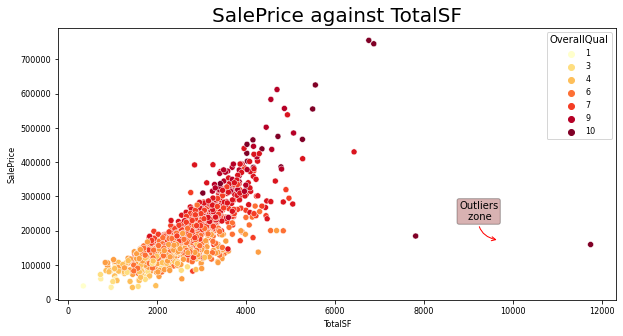

In [73]:
# Set the color palette
sns.set_palette(palette= sns.color_palette('RdBu_r'))

# line plot OverallQual vs. SalePrice
figure = plt.figure(figsize = (10,5))

ax = sns.scatterplot(x = 'TotalSF', y = 'SalePrice', data = train_data, hue='OverallQual', palette= 'YlOrRd')

plt.title("SalePrice against " + 'TotalSF', fontdict={'fontsize': 20})

x = mean(train_data['TotalSF'][outliers_TotalSF])
y = mean(train_data['SalePrice'][outliers_TotalSF])
        
ax.annotate('Outliers\n zone', xy=(x-100, y+0), xytext=(-20,20), 
    textcoords='offset points', ha='center', va='baseline',
    bbox=dict(boxstyle='round,pad=0.2', fc='maroon', alpha=0.3),
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
    color='red'))


<table id=Prepering-Data-for-models style="width:100%">
<tr><td><h1>Prepering Data for models</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

### Target variable treatment

In [74]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))
    sns.set_palette(palette= sns.color_palette('RdBu_r'))
    
    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = stats.probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
 
    plt.show()

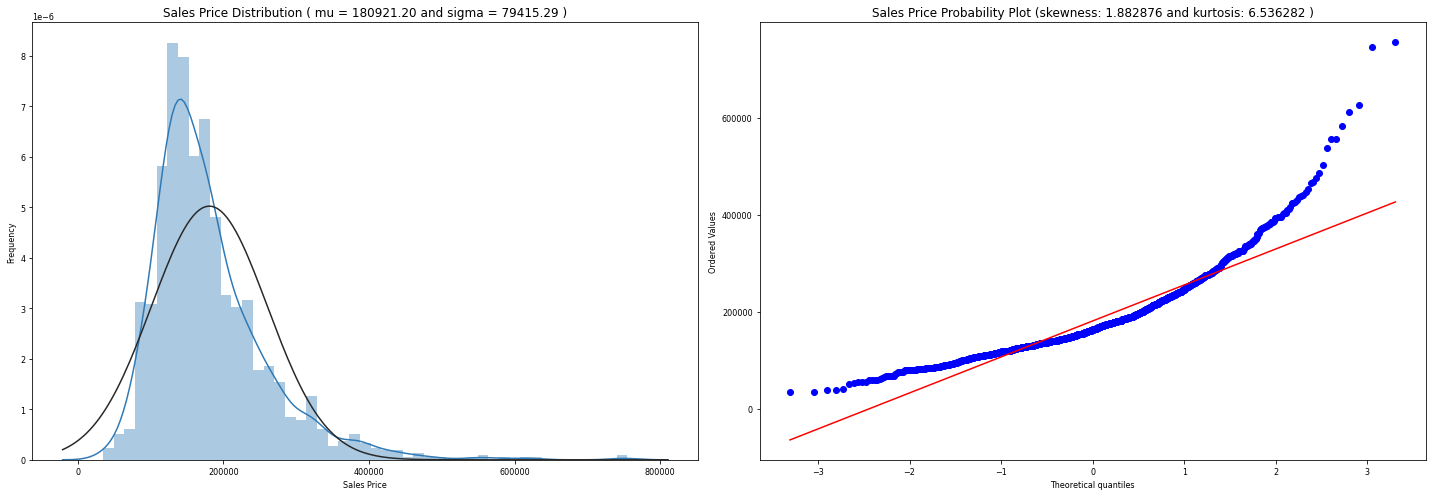

In [75]:
QQ_plot(target, 'Sales Price')

<div class="alert alert-block alert-success">
Comment: <strong>competition loss is RMSLE so we need to log-transform y</strong>
</div>

In [76]:
target = np.log1p(target)

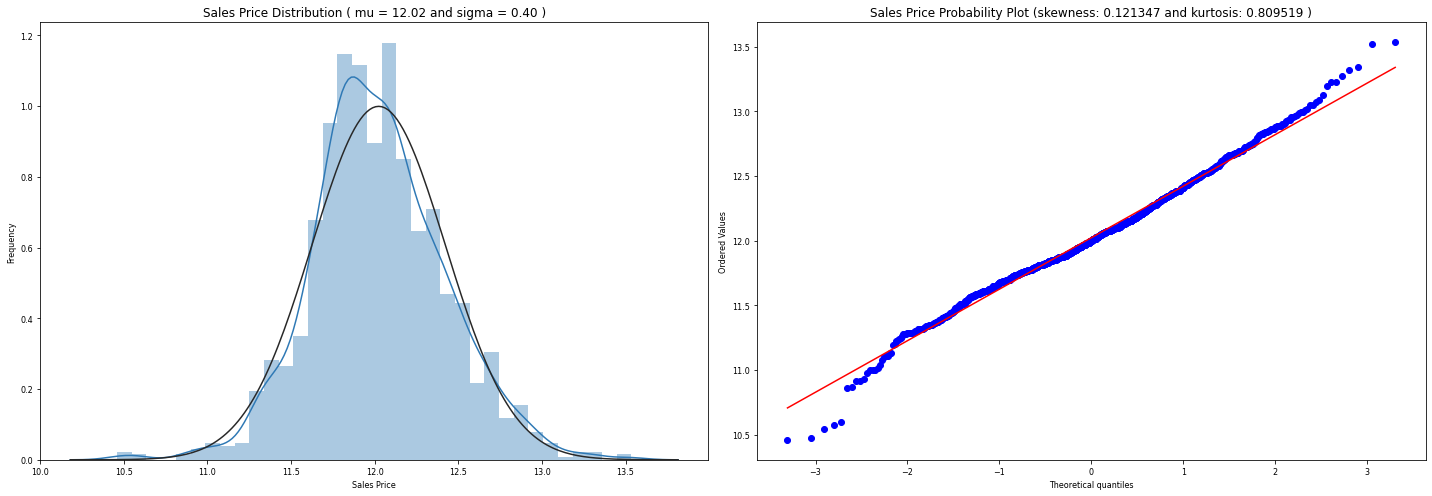

In [77]:
QQ_plot(target, 'Sales Price')

<div class="alert alert-block alert-success">
Comment <strong> </strong>
</div>

### Predictors treatment

<div class="alert alert-block alert-success"><B>Whom to remove:</B>
<BR>'GarageCars' and 'GarageArea' are highly  corellated (which makes sense), and they also have a similar corellation to target, but since <b>'GarageCars'</b> has a slight less information (categorical) we shall remove it. 
<BR>Also 'GrLivArea' and 'TotRmsAbvGrd'  are highly  corellated (which also surprisingly makes sense), but since 'GrLivArea' has a a high corellation to target we shall remove <b>'TotRmsAbvGrd'</b>. 
<BR>Same for '1stFlrSF' and 'TotalBsmtSF'. '1stFlrSF' has smaller corellation to target and thus we will remove <b>'1stFlrSF'</b>.
<BR>
<BR> This is a classic example of <b>feature selection in supervised learning</b>. 
<BR> Corellated features is like sampling same information twice, they add no new information and hance it's a good idea to remove them for a better prediction.   
    
</div>.

In [78]:
# remove categorial features which are highly correlated with other features
all_data = all_data.drop(['GarageCars', 'TotRmsAbvGrd', '1stFlrSF', 'TotalBsmtSF', 'GrLivArea'], axis=1)

### Encoding

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

In [79]:
# Label Encoding some categorical variables that may contain information in their ordering set

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'OverallCond')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print(all_data.shape)

(2919, 75)


In [80]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 217)


### Transform skewed features
Models do better with features that are not skewed.
Log transform only features that have abs(skew)>0.5

In [81]:
# Create new DF with numerical features. For each feature calculate the skew and decide if need to
# transform according to abs(skew)>0.5
skew_df = pd.DataFrame(all_data.select_dtypes(np.number).columns,columns=['Feature'])
skew_df['skew'] = skew_df['Feature'].apply(lambda feature: skew(all_data[feature]))
skew_df['Absolute skew'] = np.abs(skew_df['skew'])
skew_df['Skewed'] = skew_df['Absolute skew']>=0.5

In [82]:
skew_df

,Feature,skew,Absolute skew,Skewed
0,Id,0.000000,0.000000,False
1,MSSubClass,0.138396,0.138396,False
2,LotFrontage,1.505704,1.505704,True
3,LotArea,12.822431,12.822431,True
4,Street,-15.500133,15.500133,True
...,...,...,...,...
212,SaleCondition_AdjLand,15.500133,15.500133,True
213,SaleCondition_Alloca,10.891891,10.891891,True
214,SaleCondition_Family,7.776409,7.776409,True
215,SaleCondition_Normal,-1.691530,1.691530,True


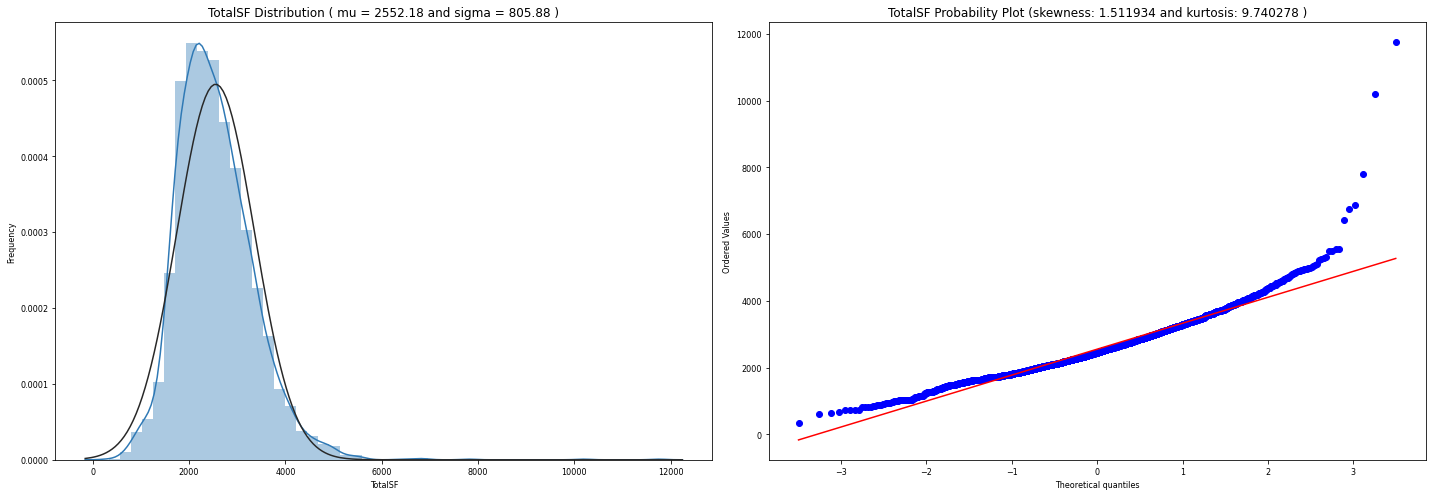

In [83]:
#An example of skewed feature before fixing:
QQ_plot(all_data['TotalSF'], 'TotalSF')

In [84]:
# Log transform each of the skewed features
for col in skew_df[skew_df['Skewed']==True]['Feature'].values:
        all_data[col] = np.log1p(all_data[col])

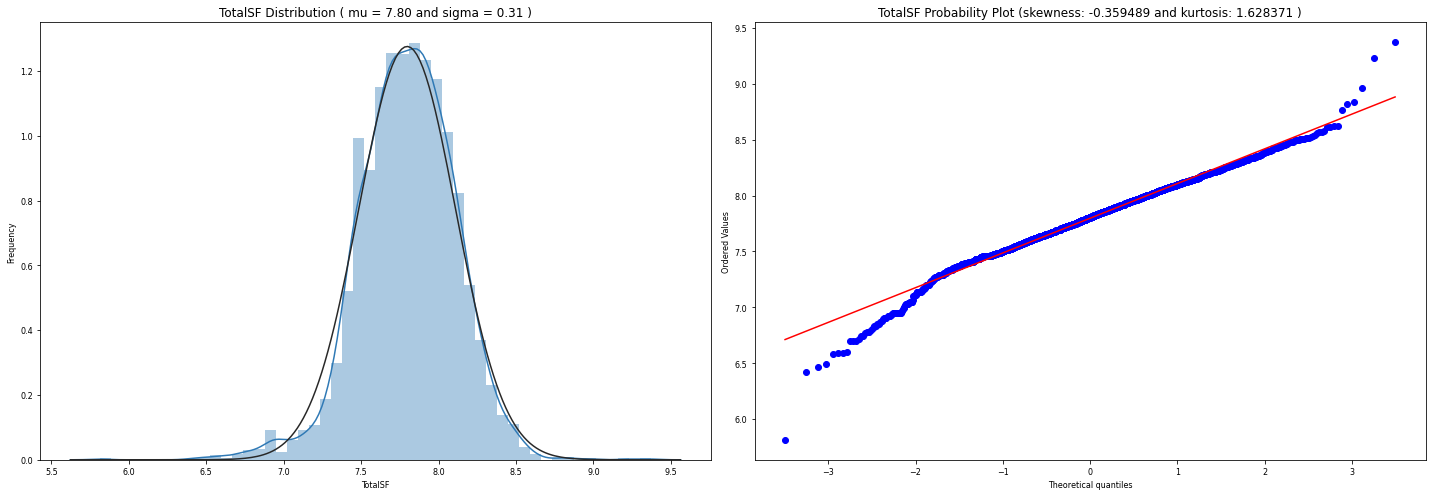

In [85]:
#An example of skewed feature after fixing:
QQ_plot(all_data['TotalSF'], 'TotalSF')

### Cosine transform for cyclical features
Use cosine transform so the cyclic feature will be evident in the data

In [86]:
all_data['MoSold'] = -np.cos(0.5236*all_data['MoSold'])

## Splitting the train data

In [87]:
ntest = test_data.shape[0]+1 #number of rows in test data
train = all_data.iloc[:ntest, :]
test = all_data.iloc[ntest:, :]
print(train.shape, test.shape)

(1460, 217) (1459, 217)


In [88]:
#removing 'Id' column which is just the DB table index
train = train.drop('Id',axis=1) 
test_Ids = test_data['Id']
test = test.drop('Id',axis=1) 

In [89]:
feature_names = train.columns

### Outliers

In [90]:
outliers = list(set(outliers_TotalSF + outliers_GarageArea))
outliers

[1061, 581, 1190, 523, 1298]

In [91]:
train = train.drop(outliers)
target = target.drop(outliers)

In [92]:
X_train, X_validate, y_train, y_validate = train_test_split(train,target,test_size=0.3,random_state=0)

In [93]:
X_train

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1226,10,4.465908,9.588708,0.693147,0.693147,0.000000,0.0,6,1.609438,7.604894,...,0.0,0.000000,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000
520,4,4.110874,9.287394,0.693147,0.000000,1.386294,0.0,4,1.945910,7.550135,...,0.0,0.000000,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000
1399,9,3.951244,8.727778,0.693147,0.693147,1.386294,0.0,6,1.791759,7.563201,...,0.0,0.000000,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000
1395,10,4.488636,9.446677,0.693147,0.693147,0.000000,0.0,8,1.609438,7.603898,...,0.0,0.000000,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000
726,5,4.262680,9.984883,0.693147,0.693147,0.000000,0.0,6,2.197225,7.595387,...,0.0,0.000000,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,5,4.330733,9.587955,0.693147,0.693147,0.000000,0.0,9,1.609438,7.605392,...,0.0,0.693359,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.693359
837,2,3.091042,7.427144,0.693147,0.693147,1.386294,0.0,6,1.609438,7.587817,...,0.0,0.000000,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000
1220,5,4.204693,8.962007,0.693147,0.693147,0.000000,0.0,5,1.609438,7.583248,...,0.0,0.000000,0.0,0.693359,0.693359,0.0,0.0,0.0,0.000000,0.000000
560,5,4.290459,9.336268,0.693147,0.693147,0.000000,0.0,5,1.791759,7.579679,...,0.0,0.000000,0.0,0.693359,0.000000,0.0,0.0,0.0,0.693359,0.000000


<table id=-Feature-Selection style="width:100%">
<tr><td><h1>Feature Selection</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

### Ridge

In [94]:
model = make_pipeline(StandardScaler(), SGDRegressor(penalty='l2', random_state=0))
alpha_space = {'alpha': uniform(0, 1)}
alphas = []
for i in range(30):
    ridge_cv = RandomizedSearchCV(model[1], alpha_space, cv=5)
    ridge_cv.fit(X_train, y_train)
    alphas.append(ridge_cv.best_params_['alpha'])

In [95]:
ridge_best_alpha = np.array(alphas).mean()
lasso_best_alpha = 0.005
ridge_best_alpha

0.3526089981951136

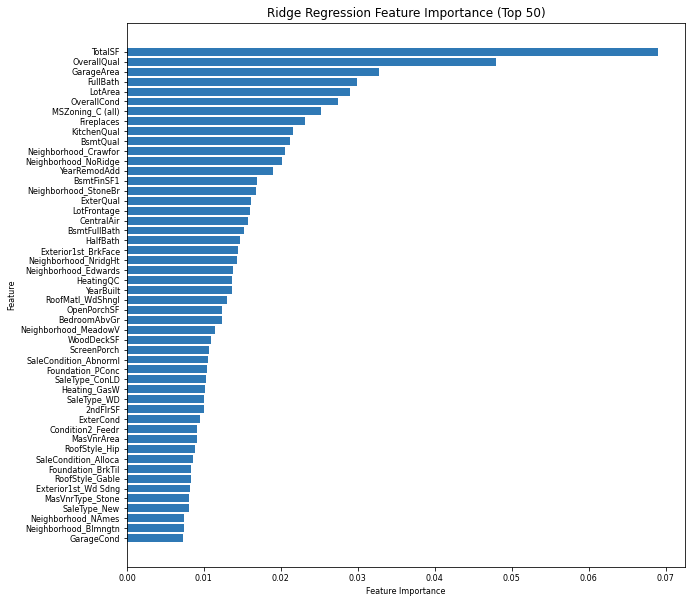

In [96]:
# Train a Ridge Regression model
ridge = make_pipeline(StandardScaler(), SGDRegressor(penalty='l2', alpha=ridge_best_alpha, random_state=0))
ridge.fit(X_train, y_train)

# Plot the feature importances
coef = ridge[1].coef_
importance = np.abs(coef)
ridge_sorted_idx = np.argsort(importance)[-50:]  # select the top 50 largest coefficients

plt.figure(figsize=(10, 10))  
plt.barh(range(len(ridge_sorted_idx)), importance[ridge_sorted_idx])
plt.yticks(range(len(ridge_sorted_idx)), np.array(feature_names)[ridge_sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Ridge Regression Feature Importance (Top 50)")
plt.show()

In [97]:
ridge_most = np.array(feature_names)[ridge_sorted_idx][::-1]

### Trees

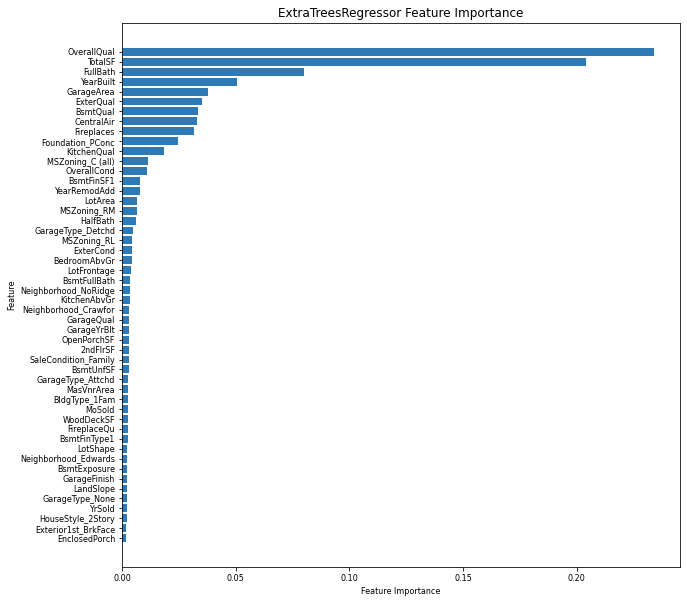

In [102]:
model = ExtraTreesRegressor()
model.fit(X_train, y_train)

plt.figure(figsize=(10, 10))
feature_rank = pd.Series(model.feature_importances_, index=feature_names)
top_n = 50
top_n_features = feature_rank.nlargest(top_n)
RF_sorted_idx = top_n_features.index[::-1]  # get indices in descending order

plt.barh(range(len(RF_sorted_idx)), top_n_features[RF_sorted_idx])
plt.yticks(range(len(RF_sorted_idx)), RF_sorted_idx)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("ExtraTreesRegressor Feature Importance")
plt.show()

In [103]:
tree_most = top_n_features[RF_sorted_idx][::-1].index

## All together

In [110]:
most_featurs = pd.Series(list(set(ridge_most) & set(tree_most)))
most_featurs

0             YearRemodAdd
1             BedroomAbvGr
2                ExterCond
3                  TotalSF
4                ExterQual
5              LotFrontage
6              OverallQual
7              OpenPorchSF
8     Neighborhood_Edwards
9      Exterior1st_BrkFace
10                HalfBath
11                2ndFlrSF
12              WoodDeckSF
13        Foundation_PConc
14    Neighborhood_NoRidge
15               YearBuilt
16              MasVnrArea
17    Neighborhood_Crawfor
18              Fireplaces
19              BsmtFinSF1
20              GarageArea
21        MSZoning_C (all)
22                FullBath
23             KitchenQual
24            BsmtFullBath
25                BsmtQual
26              CentralAir
27             OverallCond
28                 LotArea
dtype: object

<div class="alert alert-block alert-success">
Comment <strong>MOR here</strong>
</div>

<table id=SGD-Model style="width:100%">
<tr><td><h1>SGD Model</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
<td><h2>Using Ridge, Lasso, and Elasticnet regulariztions</h2></td><td></td>
</table>

### SGD - Tune Hyper Parameters

In [ ]:
# Define the parameter distribution for random search
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5],
}

# Create an instance of the SGDRegressor class
sgd = make_pipeline(StandardScaler(), SGDRegressor())

# Run the random search with 5-fold cross-validation   
random_search = RandomizedSearchCV(sgd[1], param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", random_search.best_params_)

In [ ]:
sgd = make_pipeline(StandardScaler(), SGDRegressor(penalty= 'l1', max_iter= 1000, alpha= 0.10))
scores = cross_val_score(sgd, X_train, y_train, cv=15)
print(f"{scores.mean():.3f} (+/- {scores.std():.3f})")


### SGD - Evaluating on Validation set

In [ ]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train)
    rmse= np.sqrt(-cross_val_score(model, X_validate, y_validate, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
rmsle_cv(sgd)

### SGD - Model Submission 

In [ ]:
def Submission(name, model):
    model.fit(train, target)
    predictions = np.exp(model.predict(test))
    output = pd.DataFrame({'Id': test_Ids, 'SalePrice': predictions})
    file_name = name + '_submission.csv'
    output.to_csv(file_name, index=False)
    return predictions

In [ ]:
pred = Submission('sgd', sgd)

In [ ]:
sns.histplot(pred)

In [ ]:
sns.histplot(pred1)

<table id=Random-Forest-Model style="width:100%">
<tr><td><h1>Random Forest Model</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

### RF - Tune Hyper Parameters

### RF - Evaluating on Validation set

### RF - Model Submission

<table id=lin-reg style="width:100%">
<tr><td><h1>Support Vector Regression</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
<td><h2>Using PCA</h2></td><td></td>
</table>

In [106]:
scale = RobustScaler() 
df = scale.fit_transform(X_train)

pca = PCA().fit(df) 
print('With only 50 features: {:6.4%}'.format(sum(pca.explained_variance_ratio_[:1])),"is explained")

With only 50 features: 99.4006% is explained


In [84]:
# Define the pipeline
SVR_PCA = make_pipeline(RobustScaler(), PCA(n_components=2), SVR())

scores = cross_val_score(SVR_PCA, X_train, y_train, cv=15)
print(f"{scores.mean():.3f} (+/- {scores.std():.3f})")

0.540 (+/- 0.072)


### SVR - Tune Hyperparameters

In [ ]:
# Define the hyperparameter space
hyperparameters = {
    'pca__n_components': range(3, 11),
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__C': uniform(loc=0, scale=100),
    'svr__gamma': ['scale', 'auto'] + list(uniform(loc=0, scale=10).rvs(10))
}

# Define the randomized search with cross-validation
random_search = RandomizedSearchCV(
    SVR_PCA, 
    hyperparameters, 
    n_iter=20, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    random_state=42
)

# Fit the randomized search on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", -random_search.best_score_)

### LR - Evaluating on Validation set 

### LR - Submission

<table id=Ensemble-of-the-Models style="width:100%">
<tr><td><h1>Ensemble of the Models</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

### Create Ensemble

### Evaluating on Validation set

<table id=Final-Submission style="width:100%">
<tr><td><h1>Final Submission</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

<table id=Conclusions style="width:100%">
<tr><td><h1>Conclusions</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

- improving modules
- learned from others
- tip of the iceberg


<table id=References style="width:100%">
<tr><td><h1>References</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

Main:
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data


PCA:

https://www.kaggle.com/code/mgmarques/houses-prices-complete-solution


https://www.kaggle.com/code/massquantity/all-you-need-is-pca-lb-0-11421-top-4

https://www.kaggle.com/code/willkoehrsen/introduction-to-feature-selection

preprocessing, , heatmap, PCA, submission:
https://www.kaggle.com/code/ryanholbrook/feature-engineering-for-house-prices

Ensemble:
https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition


https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

submission example: 
https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook

Missing Data refference from: 
https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

heatmap:
https://stackoverflow.com/questions/66171071/how-to-restrict-a-correlation-heatmap-to-interesting-cells-and-add-stars-to-mark

https://stackoverflow.com/questions/71350386/how-to-change-the-font-labels-of-heatmap

outliers:
https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff

https://chat.openai.com/chat

https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/

https://realpython.com/python-enumerate/

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

https://matplotlib.org/stable/gallery/color/named_colors.html

https://stackoverflow.com/questions/9074996/how-to-annotate-point-on-a-scatter-automatically-placed-arrow

https://www.w3schools.com/

https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython

https://unicode.org/emoji/charts/full-emoji-list.html